## NYC  Taxi Fare - Time series

In [49]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #operating system dependent modules of Python
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
%matplotlib inline
import itertools
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns     #seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  #自相关图
from statsmodels.tsa.stattools import adfuller as ADF  #平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf    #偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
from statsmodels.tsa.arima_model import ARIMA

import statsmodels.api as sm
import scipy
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib
import matplotlib.pyplot as plt

## Data

## Data Manipulation

    max_rows_analyzed is smaller than dataset shape 4843095...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 17)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    17 Predictors classified...
        2 variables removed since they were ID or low-information variables
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All Scatter Plots = 21


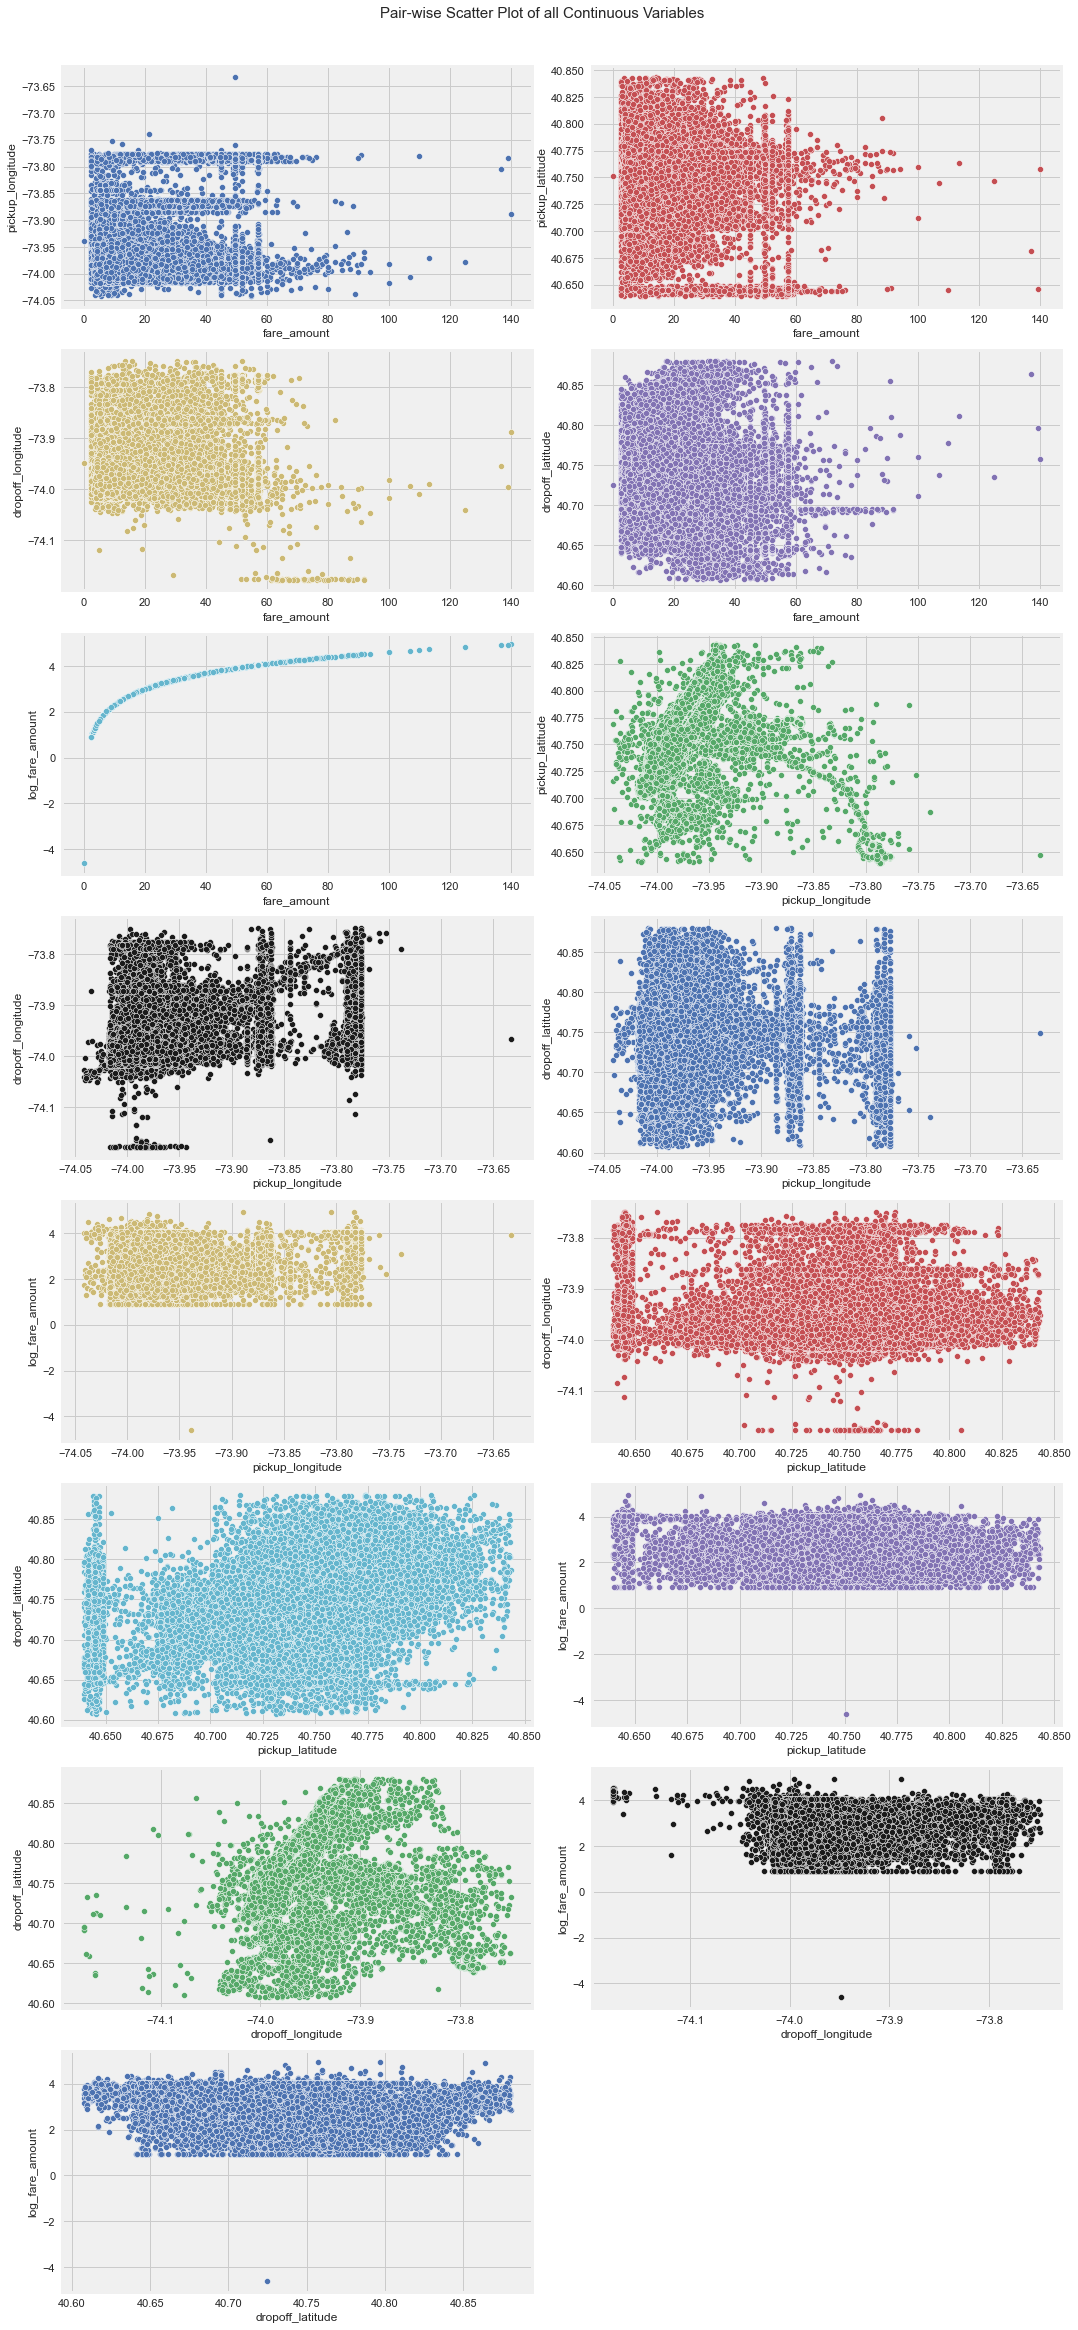

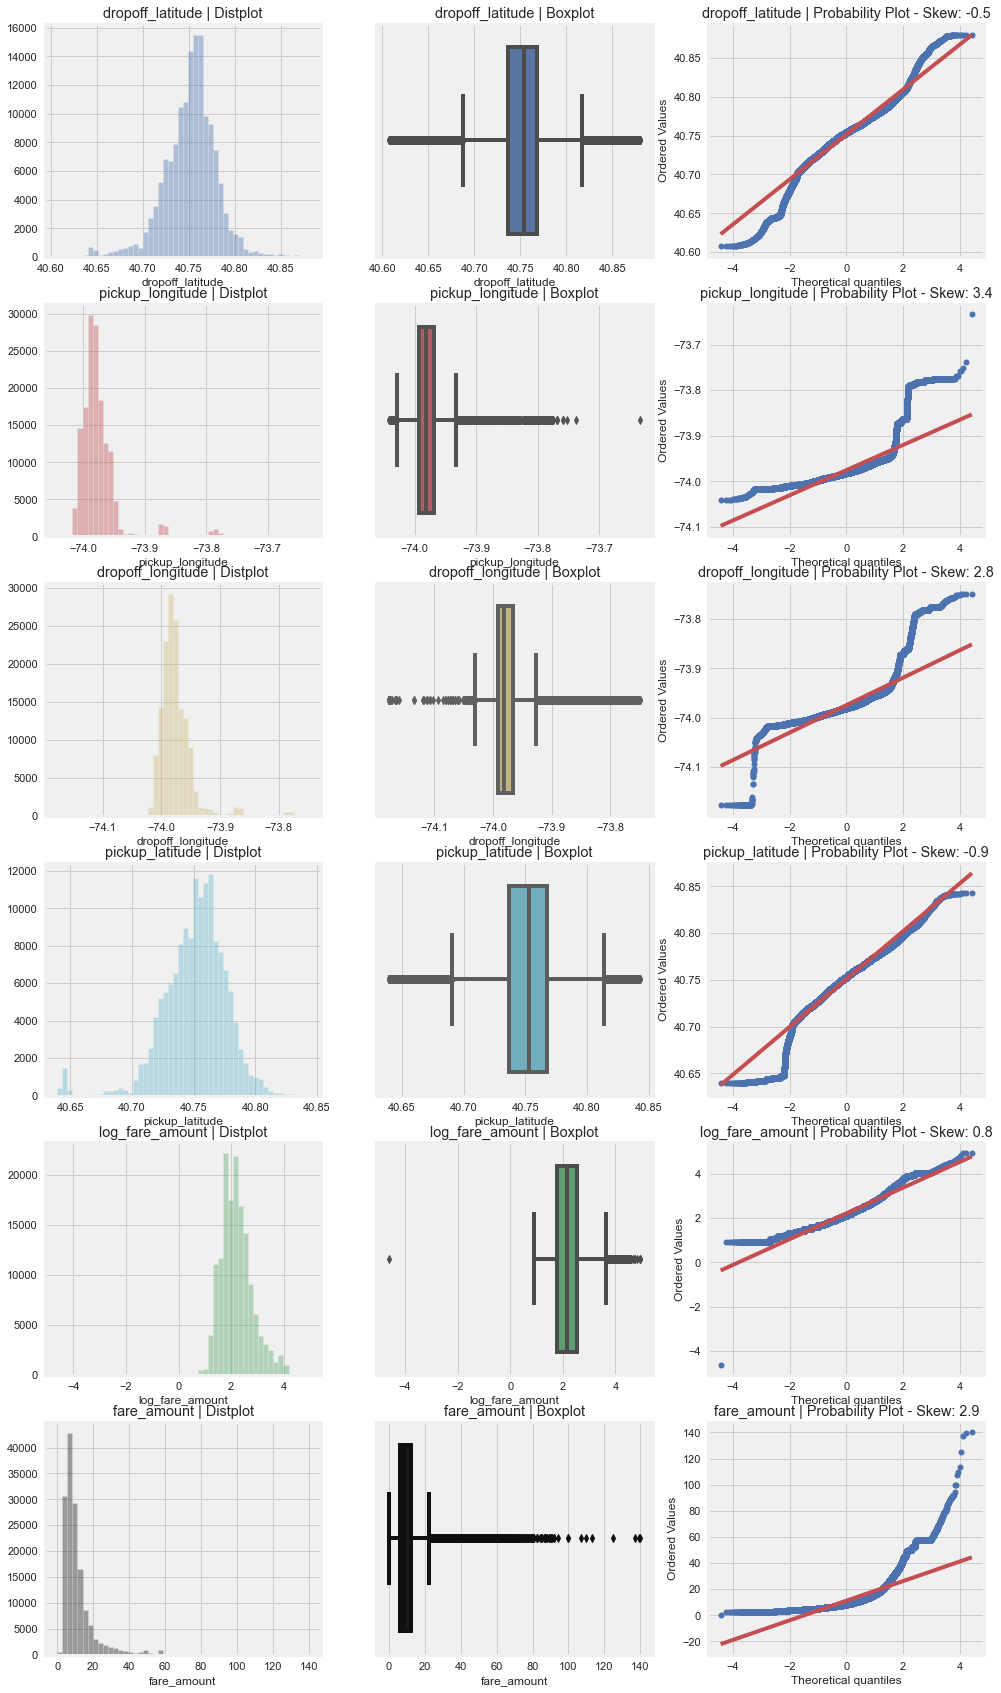

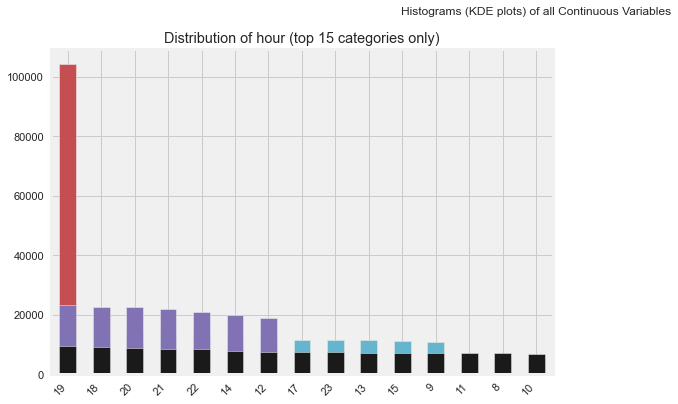

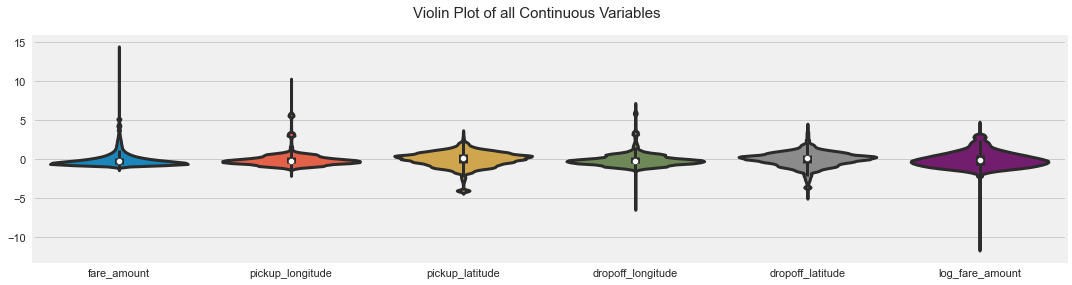

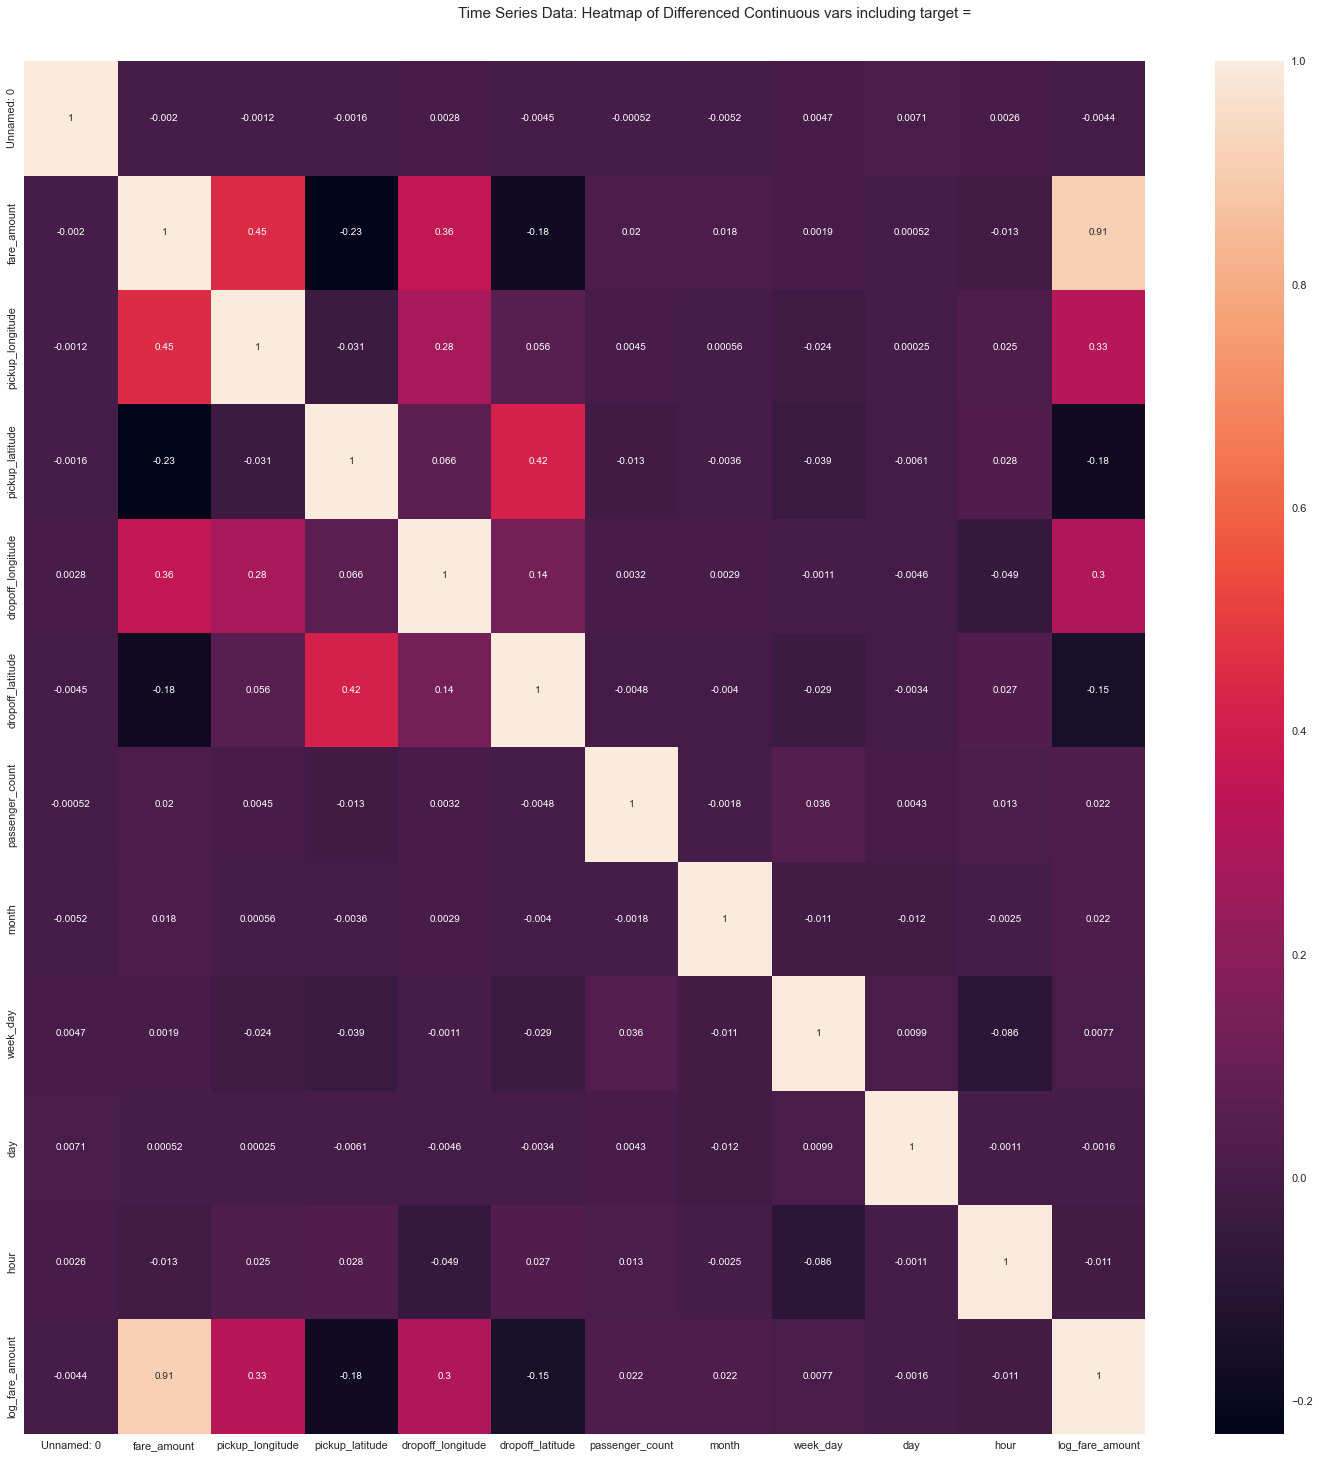

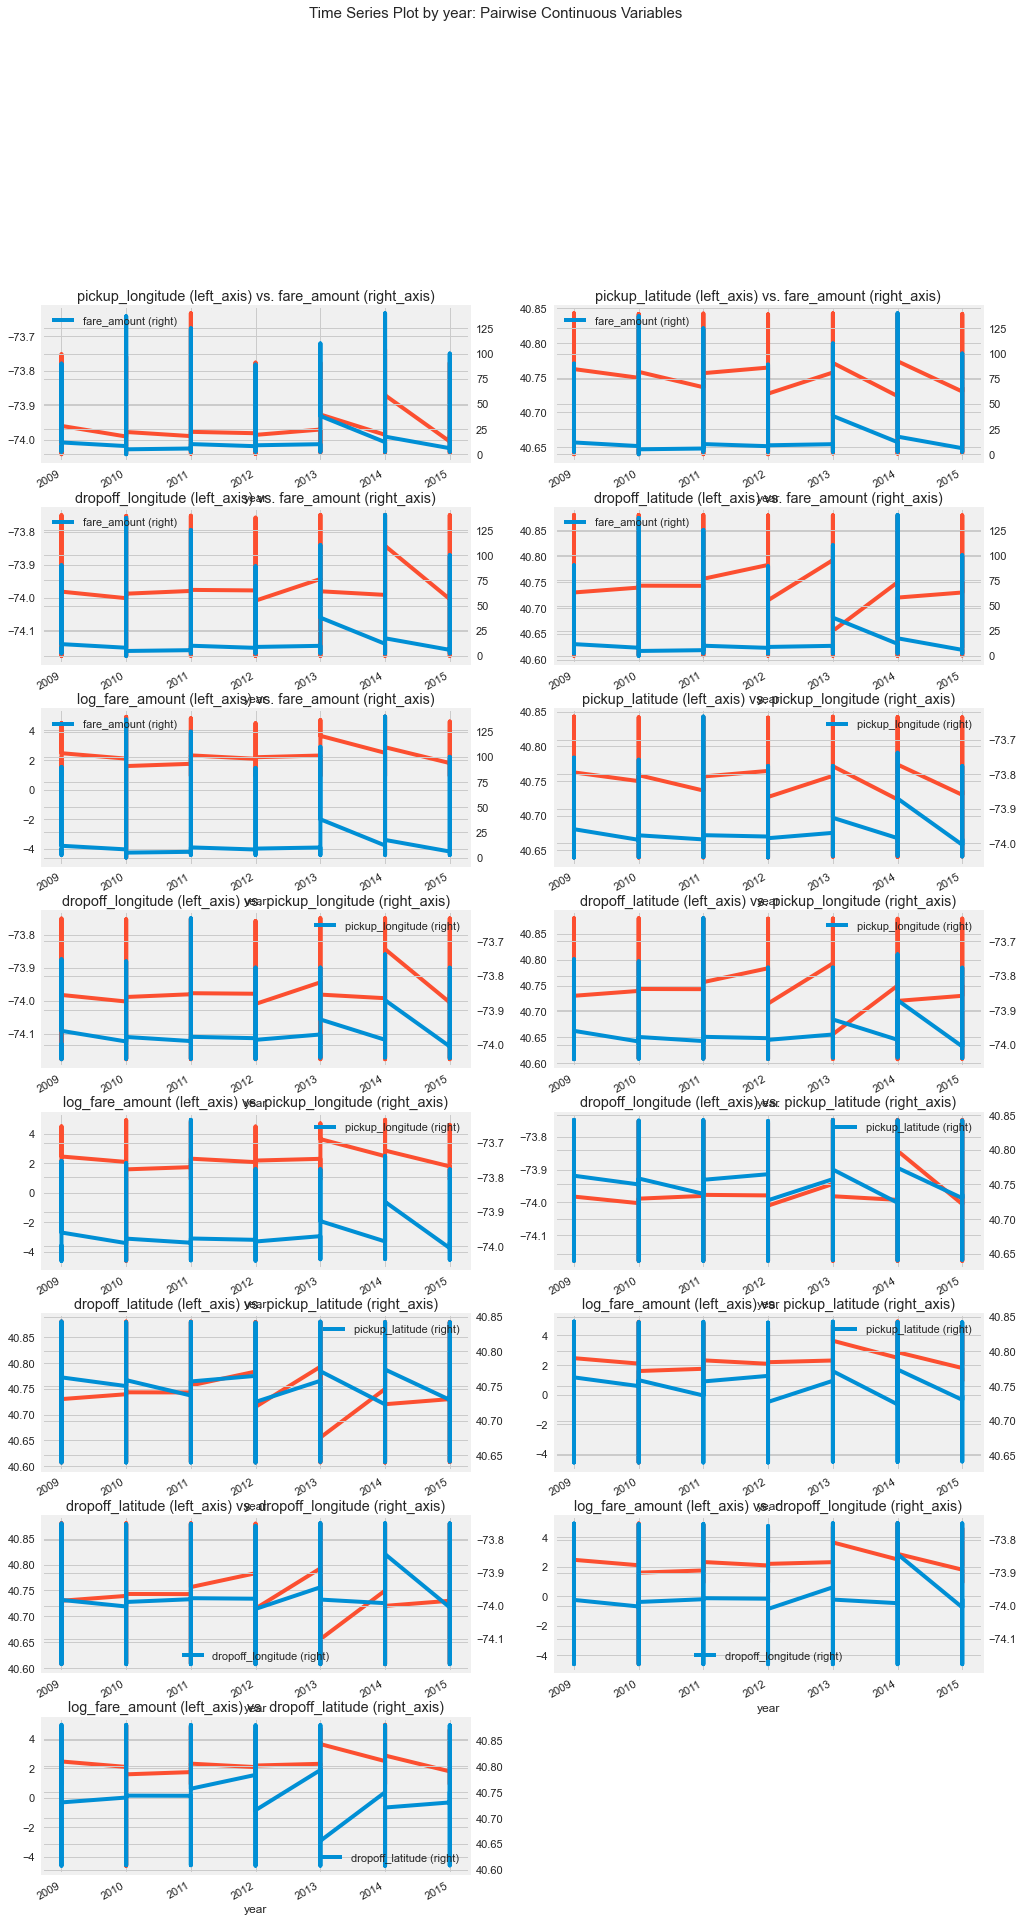

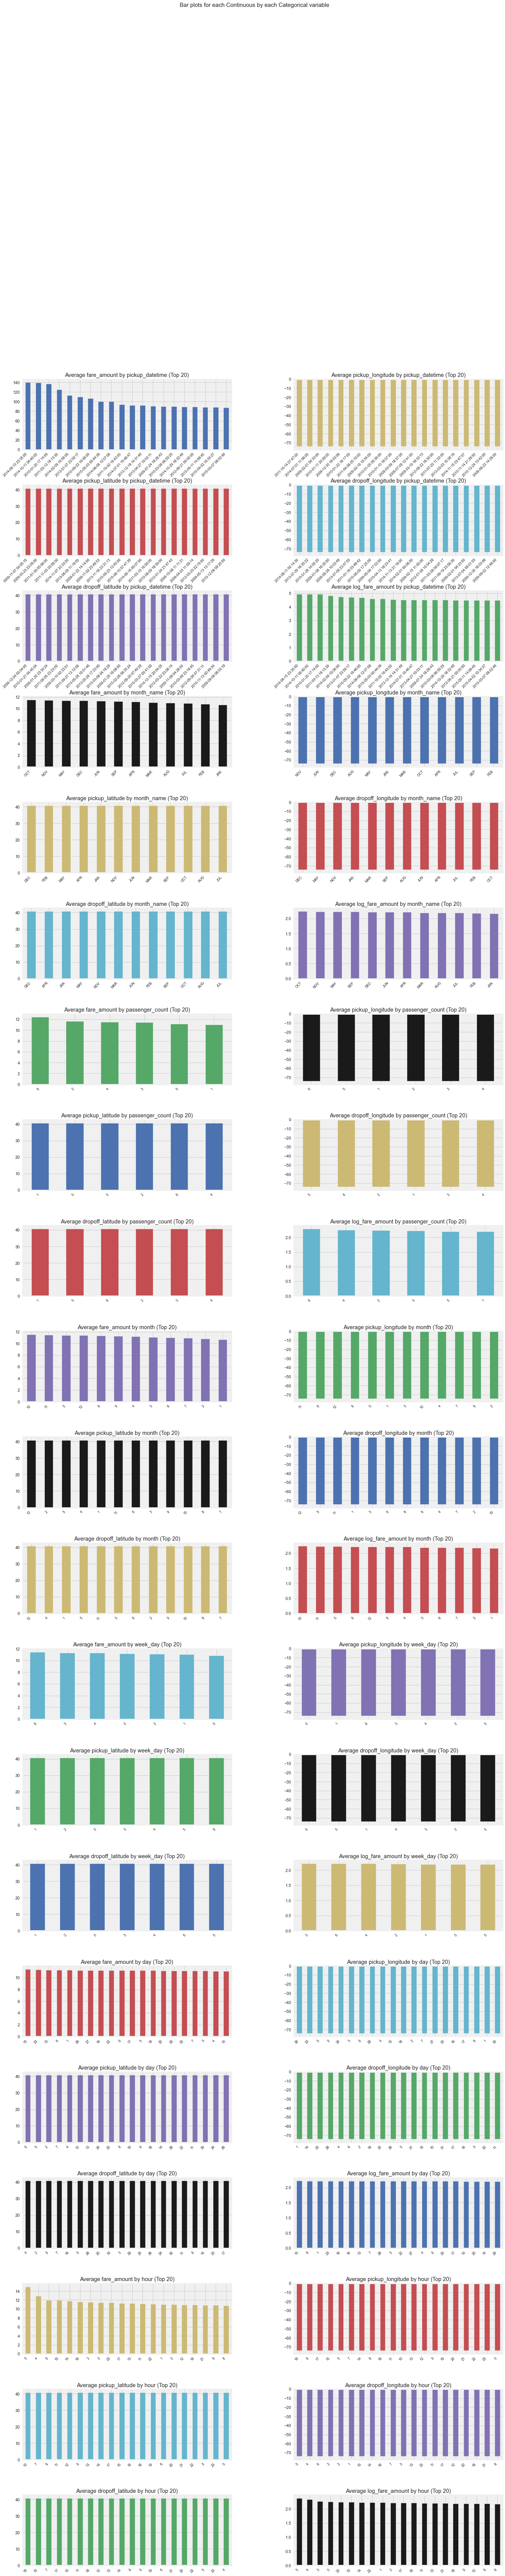

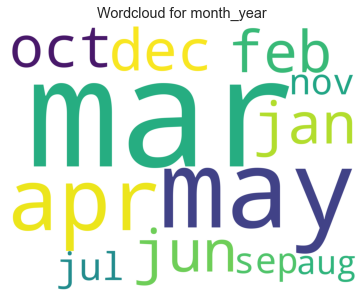

Time to run AutoViz = 112 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [17]:
AV = AutoViz_Class()
df_av = AV.AutoViz('nyc_data.csv')

## Variable Summary

In [2]:
nyc_data=pd.read_csv('nyc_data.csv')

In [25]:
summary = nyc_data.describe().transpose().reset_index().rename(columns = {"index" : "variable"})
summary  = np.around(summary,2)
summary

,variable,count,mean,std,min,25%,50%,75%,max
0,fare_amount,4843095.0,11.15,9.04,0.01,6.00,8.50,12.50,145.83
1,pickup_longitude,4843095.0,-73.98,0.03,-74.04,-73.99,-73.98,-73.97,-73.15
2,pickup_latitude,4843095.0,40.75,0.03,40.64,40.74,40.75,40.77,40.84
3,dropoff_longitude,4843095.0,-73.97,0.03,-74.18,-73.99,-73.98,-73.97,-73.75
4,dropoff_latitude,4843095.0,40.75,0.03,40.61,40.74,40.75,40.77,40.88
5,passenger_count,4843095.0,1.69,1.31,1.00,1.00,1.00,2.00,6.00
6,year,4843095.0,2011.74,1.87,2009.00,2010.00,2012.00,2013.00,2015.00
7,month,4843095.0,6.27,3.44,1.00,3.00,6.00,9.00,12.00
8,week_day,4843095.0,3.04,1.95,0.00,1.00,3.00,5.00,6.00
9,day,4843095.0,15.72,8.68,1.00,8.00,16.00,23.00,31.00


In [26]:
nyc_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,month_name,month_year,week_day,day,hour,log_fare_amount,trip_distance_km,log_trip_ditance
2203030,2015-06-30 23:59:03.0000004,11.0,2015-06-30 23:59:03,-73.969475,40.750282,-73.993965,40.751568,1,2015,6,JUN,2015 - JUN,1,30,23,2.397895,2.068571,0.726858
2031461,2015-06-30 23:56:50.0000001,14.5,2015-06-30 23:56:50,-73.992104,40.734531,-73.960335,40.775703,1,2015,6,JUN,2015 - JUN,1,30,23,2.674149,5.304466,1.668549
3088533,2015-06-30 23:56:00.0000001,20.0,2015-06-30 23:56:00,-73.970154,40.757011,-73.962608,40.708641,1,2015,6,JUN,2015 - JUN,1,30,23,2.995732,5.417685,1.689669
3211962,2015-06-30 23:55:51.0000007,6.5,2015-06-30 23:55:51,-74.010147,40.720520,-74.000557,40.727139,1,2015,6,JUN,2015 - JUN,1,30,23,1.871802,1.093388,0.089281
785182,2015-06-30 23:53:49.0000003,7.5,2015-06-30 23:53:49,-73.959969,40.762405,-73.953064,40.782688,1,2015,6,JUN,2015 - JUN,1,30,23,2.014903,2.329810,0.845787


# 1. total_fare_amount data feature

<AxesSubplot:xlabel='month_year'>

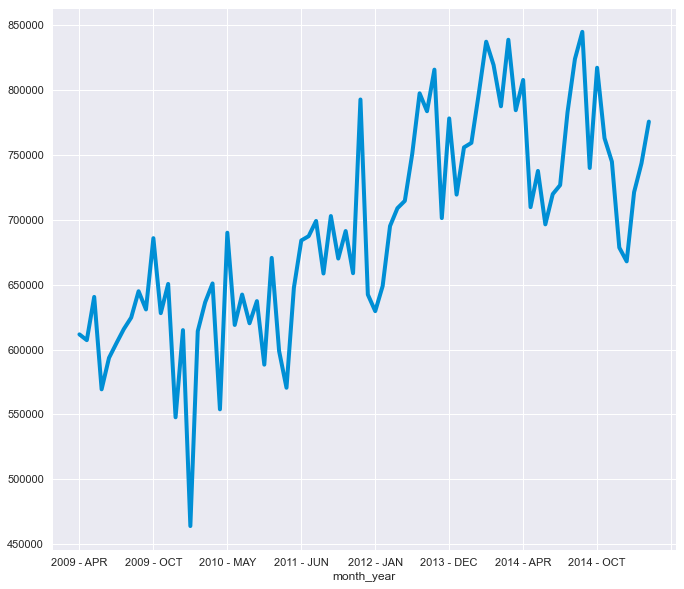

In [37]:
nyc_data_time=nyc_data.groupby(['month_year']).sum()
plt.figure(figsize = (10,10))
nyc_data_time['fare_amount'].plot()

<AxesSubplot:xlabel='hour'>

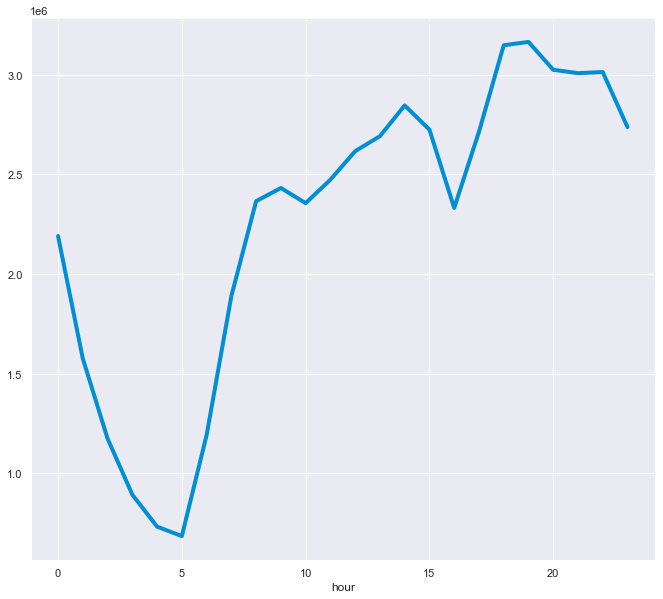

In [40]:
nyc_data_hour=nyc_data.groupby(['hour']).sum()
plt.figure(figsize = (10,10))
nyc_data_hour['fare_amount'].plot()

## Distribution of fare amount

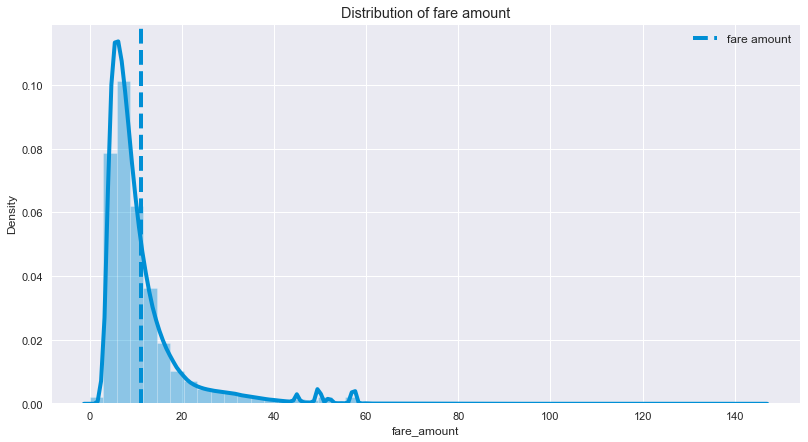

In [27]:
plt.figure(figsize = (12,7))
sns.distplot(nyc_data["fare_amount"])
plt.axvline(nyc_data["fare_amount"].mean(),
            linestyle = "dashed",label = "fare amount")
plt.title("Distribution of fare amount")
plt.legend(loc = "best",prop = {"size" : 12})
plt.show()

## Distribution of distance

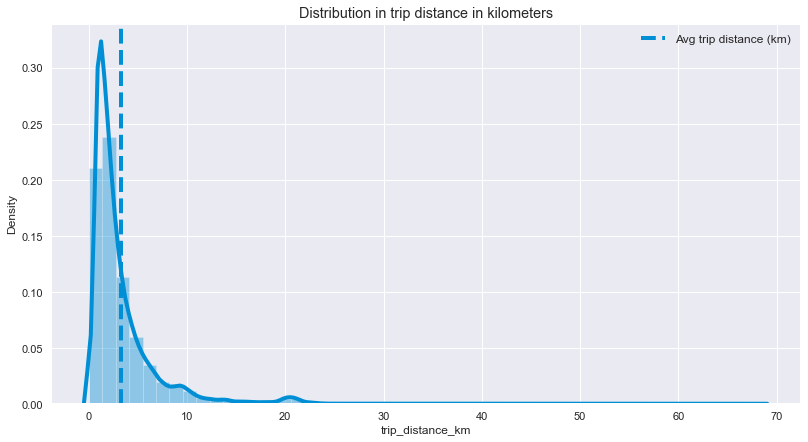

In [39]:
plt.figure(figsize = (12,7))
sns.distplot(nyc_data["trip_distance_km"])
plt.axvline(nyc_data["trip_distance_km"].mean(),
            linestyle = "dashed",label = "Avg trip distance (km)")
plt.title("Distribution in trip distance in kilometers")
plt.legend(loc = "best",prop = {"size" : 12})
plt.show()

## Total  trips , passengers and fare amount by year

In [2]:
df=pd.read_csv('time series forecasting.csv',parse_dates=['date'], index_col='date')

In [3]:
df.head()

,fare_amount
date,
2009-01-01,593567.29
2009-02-01,569353.77
2009-03-01,624612.44
2009-04-01,611667.00
2009-05-01,644893.25


In [13]:
df.shape

(78, 4)

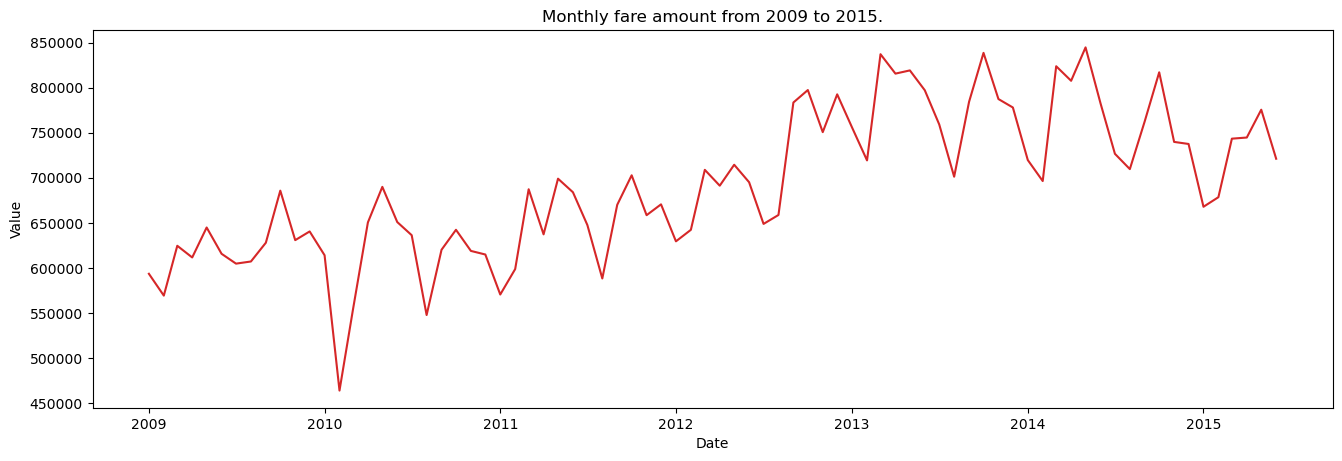

In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
 
 
plot_df(df, x=df.index, y=df.fare_amount, title='Monthly fare amount from 2009 to 2015.')

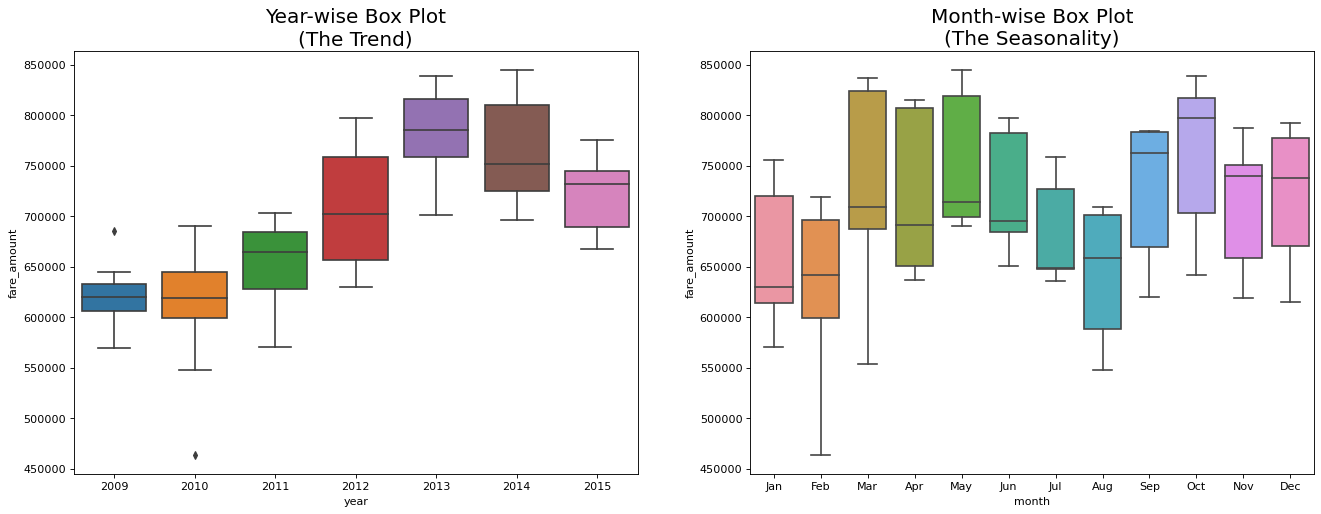

In [5]:
df.reset_index(inplace=True)
 
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()
 
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='fare_amount', data=df, ax=axes[0])
sns.boxplot(x='month', y='fare_amount', data=df.loc[~df.year.isin([2009, 2015]), :])
 
# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [12]:
# plt.rcParams.update({'figure.figsize':(10,5)})
# plot_acf(df, lags=50);

In [7]:
from statsmodels.tsa.stattools import adfuller

series=df['fare_amount']
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.189738
p-value: 0.677995
Critical Values:
	1%: -3.535
	5%: -2.907
	10%: -2.591


#the time-series might not be stationary

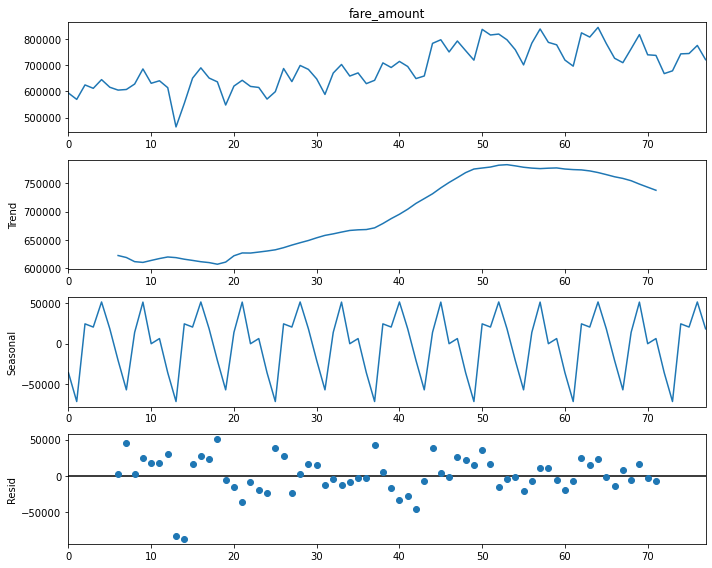

In [54]:
matplotlib.rcParams['figure.figsize'] = [10, 8]
res = sm.tsa.seasonal_decompose(df.fare_amount,model='additive',period=12)
res.plot()
plt.show()

In [9]:
# raw
series=df['fare_amount']#.diff()
result = adfuller(series.dropna())
print('raw observations:')
print('  ADF Statistic: %f' % result[0])
print('  p-value: %f' % result[1])


# first order differencing
series=df['fare_amount'].diff()
result = adfuller(series.dropna())
print('\n1st order differencing:')
print('  ADF Statistic: %f' % result[0])
print('  p-value: %f' % result[1])

# second order differencing
series=df['fare_amount'].diff().diff()
result = adfuller(series.dropna())
print('\n2nd order differencing:')
print('  ADF Statistic: %f' % result[0])
print('  p-value: %f' % result[1])

raw observations:
  ADF Statistic: -1.189738
  p-value: 0.677995

1st order differencing:
  ADF Statistic: -1.885859
  p-value: 0.338742

2nd order differencing:
  ADF Statistic: -5.610024
  p-value: 0.000001


In [38]:
plt.rcParams.update({'figure.figsize':(15,8)})

In [ ]:
# choose 2 for d

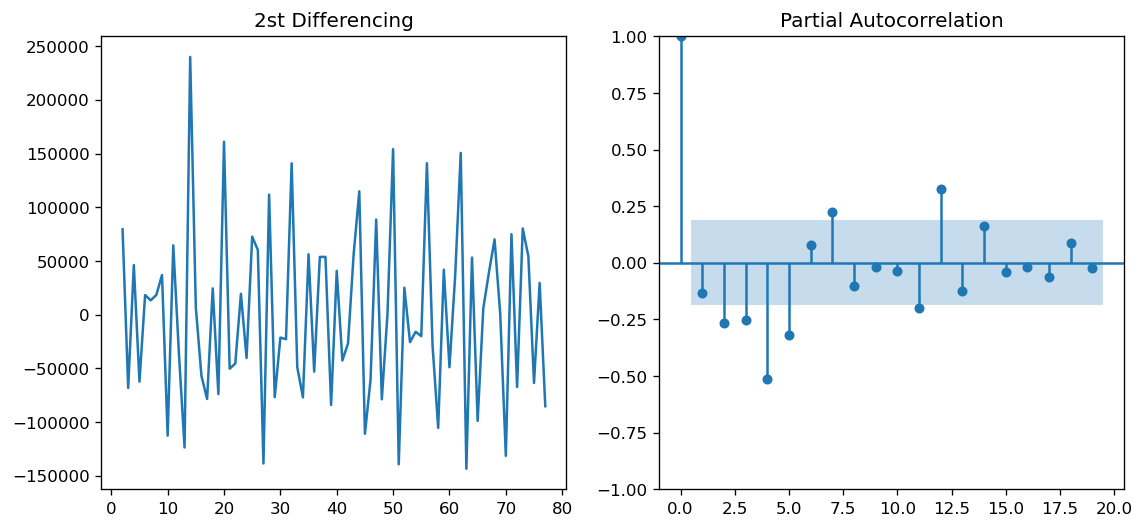

In [42]:
# AR term (q)
fig, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].plot(df['fare_amount'].diff().diff())
axes[0].set_title('2st Differencing')
# axes[1].set_ylim(0,1)
plot_pacf(df['fare_amount'].diff().dropna(), ax=axes[1],alpha=0.1) #plot differences between consequtive observations
plt.show()

In [ ]:
# AR term: 4

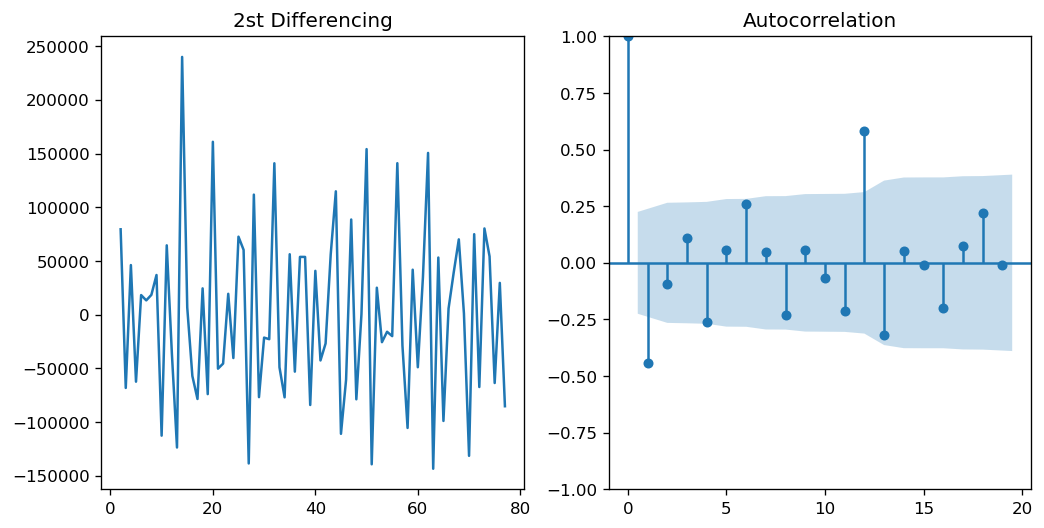

In [44]:
# MA term（p）
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(df['fare_amount'].diff().diff()); axes[0].set_title('2st Differencing')
plot_acf(df['fare_amount'].diff().diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
# MA term: 2

In [ ]:
# we fit an ARIMA(4,2,2) model

                               SARIMAX Results                                
Dep. Variable:            fare_amount   No. Observations:                   60
Model:                 ARIMA(4, 2, 2)   Log Likelihood                -727.723
Date:                Tue, 26 Apr 2022   AIC                           1469.445
Time:                        23:25:22   BIC                           1483.868
Sample:                             0   HQIC                          1475.063
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6959      0.076     -9.204      0.000      -0.844      -0.548
ar.L2          0.1806      0.102      1.768      0.077      -0.020       0.381
ar.L3         -0.1577      0.125     -1.257      0.2

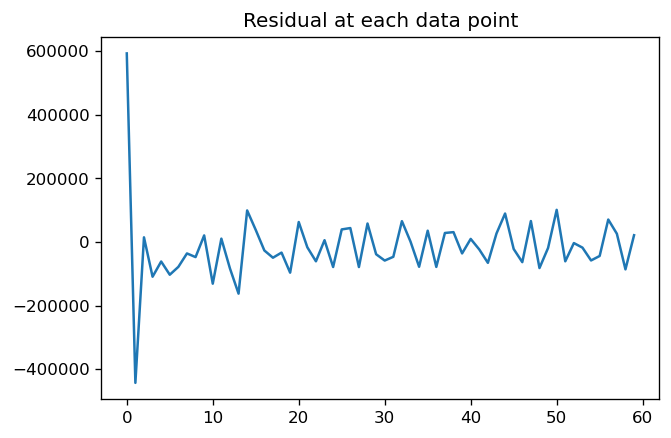

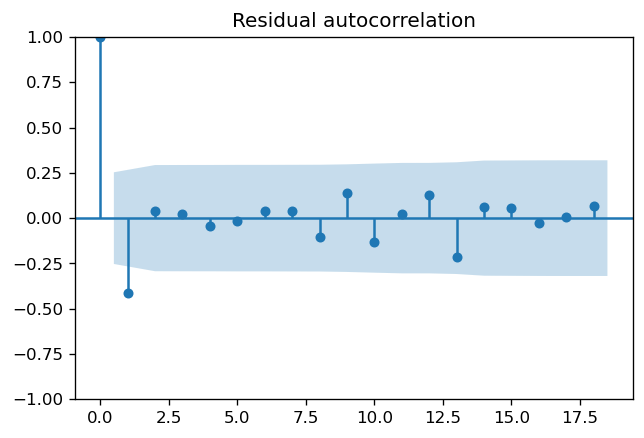

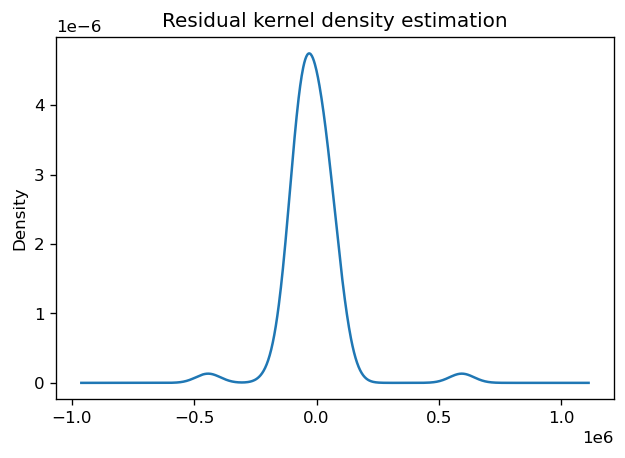

                   0
count      60.000000
mean   -16863.178235
std    113603.797174
min   -443160.718518
25%    -63868.007306
50%    -24991.202550
75%     27267.529162
max    593567.290000
p value is  1.9764387022560156e-11
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected
Ljung–Box:
      lb_stat  lb_pvalue
1   10.747686   0.001044
2   10.839520   0.004428
3   10.877490   0.012407
4   11.017253   0.026371
5   11.033823   0.050713
6   11.137205   0.084227
7   11.252547   0.127976
8   12.028493   0.149937
9   13.421918   0.144426
10  14.709893   0.143002


In [22]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

P=2
D=2
Q=4

# fit model
N=60 
series = df['fare_amount']

#model = sm.tsa.SARIMAX(series[:N], order=(Q,D,P))
model = sm.tsa.ARIMA(series[:N], order=(Q,D,P))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

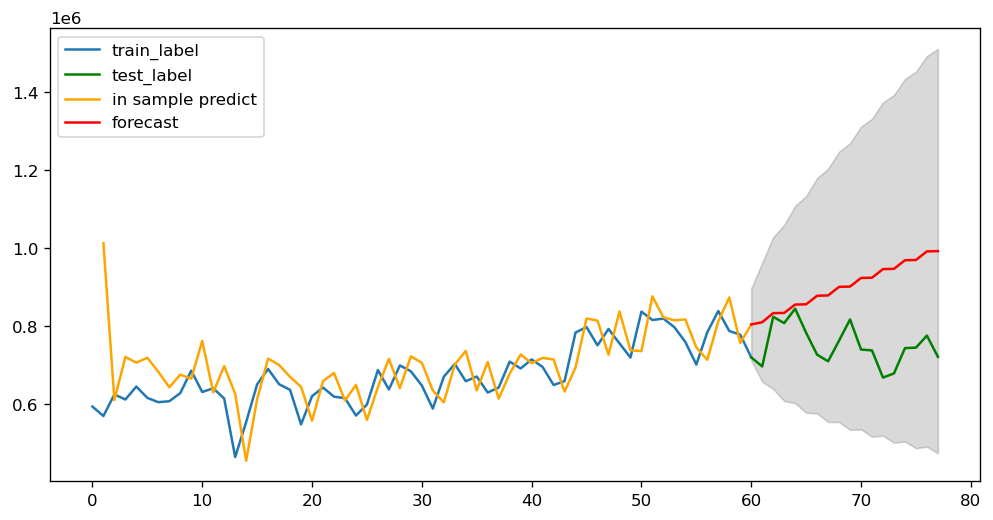

In [23]:
# Forecast

fcast = model_fit.forecast(steps=len(series)-N)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

plt.rcParams.update({'figure.figsize':(10,5)})
fig, ax = plt.subplots()
ax.plot(df.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df.iloc[1:N+1].index,model_fit.predict(start=1,end=N,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample
ax.plot(fc_series, label='forecast', color='red') # forecast
ax.fill_between(df.iloc[N:].index, lower_series, upper_series, color='k', alpha=.15) # conf
ax.legend(loc='upper left')

In [25]:
# train
X = pd.DataFrame(range(N),columns=['fare_amount'])
X = sm.add_constant(X)
lm=sm.OLS(df.fare_amount[:N],X).fit()
insample = lm.predict(X)
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     96.00
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           6.58e-14
Time:                        23:27:34   Log-Likelihood:                -732.78
No. Observations:                  60   AIC:                             1470.
Df Residuals:                      58   BIC:                             1474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.679e+05   1.26e+04     44.930      

In [26]:
#test
X = pd.DataFrame(range(N-1,len(df)),columns=['fare_amount'])
X = sm.add_constant(X)
pred = lm.predict(X)

In [55]:
# compare out-of-sample performance
print('ARIMA model out-of-sample MAE', mean_absolute_error(df.fare_amount[N:],fc_series)/N)
print('trend model out-of-sample MAE', mean_absolute_error(df.fare_amount[N-1:],pred))

ARIMA model out-of-sample MAE 2512.2096737899833
trend model out-of-sample MAE 71902.62264386329


In [35]:
plt.rcParams.update({'figure.figsize':(15,8)})

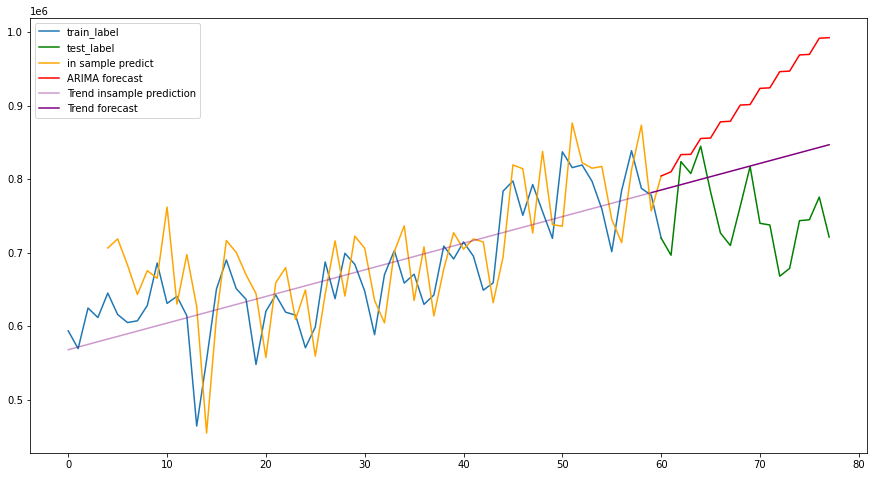

In [36]:
plt.plot(df['fare_amount'][:N+1],label='train_label')
plt.plot(range(N,len(df)),df['fare_amount'][N:],color='green',label='test_label')
plt.plot(range(P+D,N+1),model_fit.predict(start=P+D,end=N,dynamic=False,typ='levels'),color='orange',label='in sample predict')
plt.plot(fc_series, label='ARIMA forecast', color='red')

plt.plot(insample, label='Trend insample prediction', color='purple',alpha=0.4)
plt.plot(range(N-1,len(df)),pred, label='Trend forecast', color='purple')

plt.legend(loc='upper left')